In [155]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

# train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
# test_df =  pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
train_df = pd.read_csv("train.csv")
test_df =  pd.read_csv("test.csv")


In [156]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [157]:
print("原數據機集中的異常值/空值")
train_df.isnull().sum()

原數據機集中的異常值/空值


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [158]:
# 填充異常值
train_df.fillna(method='bfill',axis=0,inplace=True)

<AxesSubplot:>

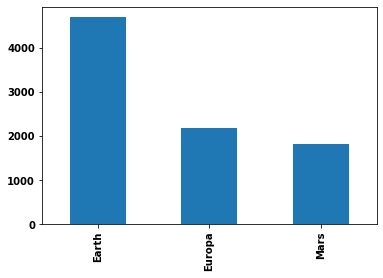

In [159]:
HomePlant = train_df['HomePlanet']
HomePlant.value_counts().plot(kind='bar')

In [160]:
cabin = train_df['Cabin']
cabin.value_counts() # pass this attributes

F/1194/P    8
G/734/S     8
B/82/S      7
F/1808/P    7
C/21/P      7
           ..
F/805/S     1
A/19/S      1
G/114/S     1
G/1227/S    1
F/1841/P    1
Name: Cabin, Length: 6560, dtype: int64

In [161]:
train_df['CryoSleep'].value_counts()


False    5569
True     3124
Name: CryoSleep, dtype: int64

In [162]:
train_df['Destination'].value_counts()

TRAPPIST-1e      6041
55 Cancri e      1836
PSO J318.5-22     816
Name: Destination, dtype: int64

In [163]:
print(train_df['Age'].value_counts())


18.0    328
24.0    326
21.0    313
22.0    303
23.0    300
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64


In [164]:
print(train_df['VIP'].value_counts())


False    8491
True      202
Name: VIP, dtype: int64


In [165]:
print(train_df['RoomService'].value_counts())


0.0       5697
1.0        119
2.0         80
3.0         62
4.0         48
          ... 
1973.0       1
782.0        1
950.0        1
658.0        1
1174.0       1
Name: RoomService, Length: 1273, dtype: int64


In [166]:
print(train_df['FoodCourt'].value_counts())


0.0       5574
1.0        118
2.0         76
4.0         54
3.0         53
          ... 
3070.0       1
1170.0       1
627.0        1
1719.0       1
1174.0       1
Name: FoodCourt, Length: 1507, dtype: int64


In [167]:
print(train_df['ShoppingMall'].value_counts())


0.0       5727
1.0        157
2.0         81
3.0         60
4.0         45
          ... 
2728.0       1
396.0        1
2315.0       1
326.0        1
620.0        1
Name: ShoppingMall, Length: 1115, dtype: int64


In [168]:
print(train_df['Spa'].value_counts())


0.0       5435
1.0        152
2.0        108
3.0         54
5.0         53
          ... 
5432.0       1
4864.0       1
2043.0       1
3803.0       1
1159.0       1
Name: Spa, Length: 1327, dtype: int64


In [169]:
print(train_df['VRDeck'].value_counts())


0.0       5623
1.0        140
2.0         72
3.0         57
5.0         51
          ... 
3173.0       1
3726.0       1
519.0        1
1467.0       1
1174.0       1
Name: VRDeck, Length: 1306, dtype: int64


**x的數據集屬性有id,HomePlanet,CryoSleep,Destination,Age**

In [170]:
''' 
查看年紀和存活率有沒有相關性
使用的是皮爾遜相關係數
''' 

age = train_df['Age']
transported = train_df['Transported']
# print(age.shape,transported.shape)
# 負相關，一個變量的值越小另一個變量的值反而越小
print(age.corr(transported))



-0.07189101830149841


In [171]:
# print("空值有",age.isnull().sum())
# # 使用fillna補充空值
# # bfill 空值取前一個
# age.fillna(method='bfill',axis=0,inplace=True)
# print("空值有",age.isnull().sum())
from scipy.stats import pearsonr
coef,p = pearsonr(age,transported)
print(coef,p)

alpha = 0.4
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)


-0.07189101830149856 1.9386629123367487e-11
Samples are correlated (reject H0) p=0.000


In [172]:
print("空值有",age.isnull().sum())
# 使用fillna補充空值
# bfill 空值取前一個
age.fillna(method='bfill',axis=0,inplace=True)
print("空值有",age.isnull().sum())
from scipy.stats import pearsonr
coef,p = pearsonr(age,transported)

alpha = 0.4
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)


空值有 0
空值有 0
Samples are correlated (reject H0) p=0.000


In [173]:
'''使用斯皮尔曼秩相关系数再次計算age之間的相關性'''

from scipy.stats import spearmanr
coef,p = spearmanr(age,transported)
print(coef,p)
alpha = 0.05 

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

-0.06722130922718975 3.526609955857696e-10
Samples are correlated (reject H0) p=0.000


In [174]:
'''使用肯德尔秩相关系数再次計算age之間的相關性'''

from scipy.stats import kendalltau
coef,p = kendalltau(age,transported)
print(coef,p)
alpha = 0.05 

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

-0.055482225267958575 3.678271028780784e-10
Samples are correlated (reject H0) p=0.000


In [175]:
# x1 = [12, 2, 1, 12, 2]
# x2 = [1, 4, 7, 1, 0]
# coef,p = kendalltau(x1, x2)
# print(coef,p)

In [176]:
def cal_corr(df1,df2):
    #接近 1 的值表示強烈同意，接近 -1 的值表示強烈不同意。
    coef,p = kendalltau(df1,df2)
    print(coef,p)
    alpha = 1
        
    if p >alpha:
        print(f'{df1}and{df2}Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)
    

In [177]:
cal_corr(train_df['VIP'],transported)

-0.03471549295975782 0.0012098126593006755
Samples are correlated (reject H0) p=0.001


In [178]:
cal_corr(train_df['Age'],transported)

-0.055482225267958575 3.678271028780784e-10
Samples are correlated (reject H0) p=0.000


In [179]:
cal_corr(train_df['Spa'],transported)

-0.33130465175614876 1.5461784052437595e-252
Samples are correlated (reject H0) p=0.000


In [180]:
type(train_df)

pandas.core.frame.DataFrame

In [181]:
# 选取x的訓練集有PassengerId,HomePlanet,CryoSleep,Destination,Age,
# y為對應的Transported
X = train_df[
    ['PassengerId','HomePlanet','CryoSleep','Destination','Age']
]
X.head()
# 因為要額外處理字符串的數值，所以不適用這種直接從母pd擷取的方法



,PassengerId,HomePlanet,CryoSleep,Destination,Age
0,0001_01,Europa,False,TRAPPIST-1e,39.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0


> 模型訓練過程中：
> <br> **ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type bool).** <br>

解決方法：
1. 需要將TrueFalse轉換成01
2. ~~將字符串需要轉換為特徵向量~~ 將字符串影射到數字


In [193]:
# version-2 --直接把對應的字符串更改為數字

X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age
0,0001_01,Europa,False,TRAPPIST-1e,39.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0


In [182]:
# '''~~先查看不同屬性中字符串的分類~~'''
# cryoSleep = train_df['CryoSleep'].astype(int)
# cryoSleep.head()

0    0
1    0
2    0
3    0
4    0
Name: CryoSleep, dtype: int64

In [183]:
# # train_df['Destination'].value_counts().plot(kind='bar')

# destination= train_df['Destination']
# destination.head()

0    TRAPPIST-1e
1    TRAPPIST-1e
2    TRAPPIST-1e
3    TRAPPIST-1e
4    TRAPPIST-1e
Name: Destination, dtype: object

In [184]:
# # destination = pd.Categorical(destination).codes
# # from keras.utils import to_categorical
# from tensorflow.keras.utils import to_categorical
# train_df['Destination'] = pd.Categorical(train_df['Destination']).codes
# destination = to_categorical(train_df['Destination'])
# print("destination",destination)

# # X = pd.Categorical(X).codes
# # X = to_categorical(X)
# # print(X)
# # HomePlant = pd.Categorical(train_df['HomePlanet']).codes
# # print('HomePlanet',HomePlant)


destination [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [185]:
# # X = pd.DataFrame([
# #     [train_df['Age'],HomePlant,destination,cryoSleep],
# # ])
# X = pd.DataFrame([
#     [train_df['Age'],destination],
# ])
# X.head()

In [186]:
Y = train_df[
    ['Transported']
]
Y.head()

,Transported
0,False
1,True
2,False
3,False
4,True


> 模型訓練過程中：
> <br> **ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type bool).** <br>
解決方法：需要將TrueFalse轉換成01


In [187]:
Y = Y.astype(int)
Y.head()

,Transported
0,0
1,1
2,0
3,0
4,1


In [188]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6519, 5) (2174, 5) (6519, 1) (2174, 1)


In [189]:
input_shape = x_train.shape[1]
output_shape = y_train.shape[1]
print(input_shape,output_shape)

5 1


構建模型

In [190]:
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf 

model = Sequential()
model.add(Input(shape=input_shape))

model.add(Dense(units=8,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(output_shape,activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 48        
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile(optimizer='adam',loss='cetegorical-crossentropy',metrics=['acc'])

In [192]:
history =model.fit(x = x_train,y = y_train,batch_size=32,epochs=10,shuffle=True,validation_data=(x_test,y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type bool).